### Clustering Question 3

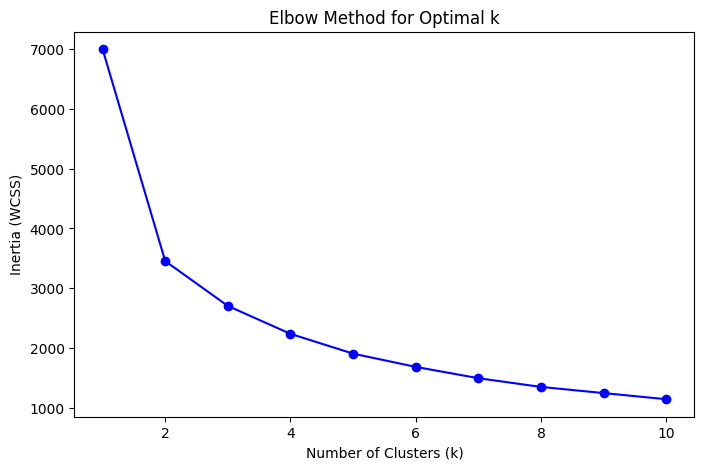

         Unit price  Quantity     Tax 5%       Total        cogs  \
Cluster                                                            
0         61.537560  6.508929  18.319183  384.702844  366.383661   
1         83.580847  8.649718  35.775537  751.286271  715.510734   
2         41.481930  3.679671   5.938098  124.700048  118.761951   

         gross margin percentage  gross income    Rating  
Cluster                                                   
0                       4.761905     18.319183  7.028869  
1                       4.761905     35.775537  6.670621  
2                       4.761905      5.938098  7.043737  


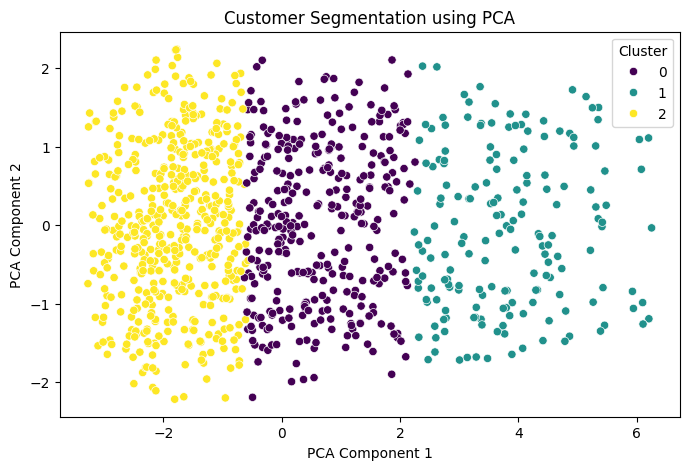

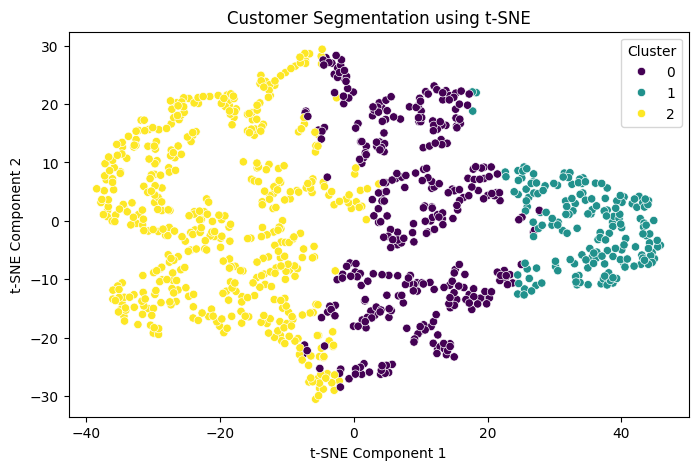

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

df = pd.read_csv('/content/supermarket_sales - Sheet1.csv')

df_numeric = df.select_dtypes(include=[np.number])

df_numeric = df_numeric.dropna()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_numeric)

inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)


plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.show()

optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

df['Cluster'] = df['Cluster'].astype(int)
print(df.groupby('Cluster').mean(numeric_only=True))

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['Cluster'], palette='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Customer Segmentation using PCA')
plt.legend(title="Cluster")
plt.show()


tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=df['Cluster'], palette='viridis')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('Customer Segmentation using t-SNE')
plt.legend(title="Cluster")
plt.show()

### Iris Question 4

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris

iris_data = load_iris()

X = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
y = pd.Series(iris_data.target, name = 'species')

print(X.head())
print(y.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64


In [ ]:
print("First five data : ")
print(X.head())
print("\nInformation : ")
print(X.info())
print("\nDescription : ")
print(X.describe())
print("\nMissing Values : ")
print(X.isnull().sum())

First five data : 
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

Information : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB
None

Description : 
       sepal length (cm)  sepal width (cm)  petal length

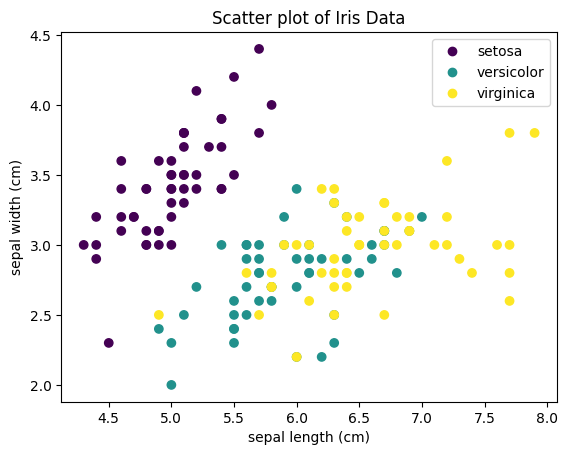

In [ ]:
import matplotlib.pyplot as plt

scatter_plot = plt.scatter(X['sepal length (cm)'], X['sepal width (cm)'], c=y, cmap='viridis')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.title('Scatter plot of Iris Data')

legend_labels = {i:name for i, name in enumerate(iris_data.target_names)}
plt.legend(handles=scatter_plot.legend_elements()[0], labels=legend_labels.values())
plt.show()

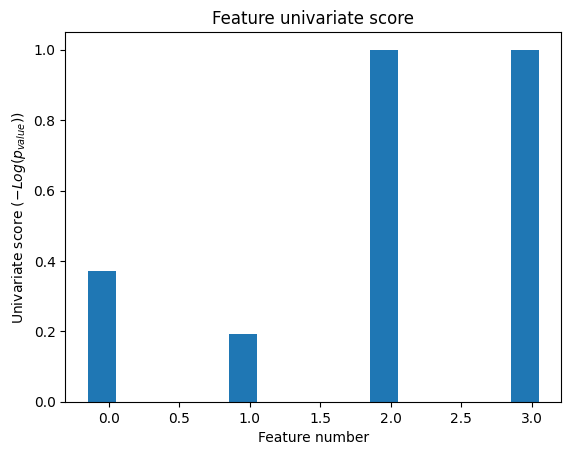

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

selector = SelectKBest(f_classif, k=4)
selector.fit(X_train, y_train)
scores = -np.log10(selector.pvalues_)
scores /= scores.max()

X_indices = np.arange(X.shape[-1])
plt.figure(1)
plt.clf()
plt.bar(X_indices - 0.05, scores, width=0.2)
plt.title("Feature univariate score")
plt.xlabel("Feature number")
plt.ylabel(r"Univariate score ($-Log(p_{value})$)")
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

feature_set = [f'feature{i}' for i in range(X.shape[-1])]
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

Elapsed time to compute the importances: 3.901 seconds


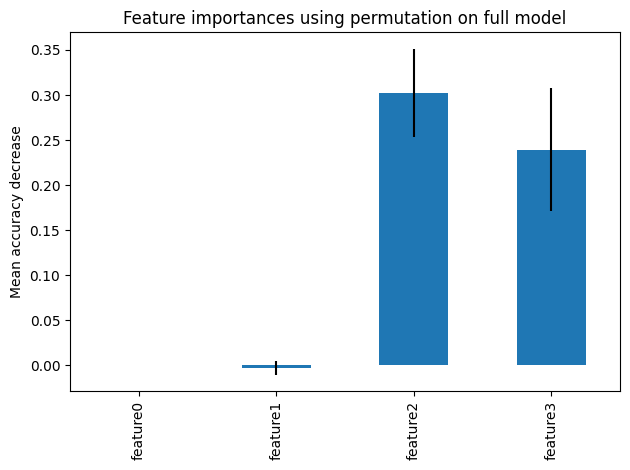

In [ ]:
import time
from sklearn.inspection import permutation_importance

start_time = time.time()
result = permutation_importance(
    forest, X_test, y_test, n_repeats=10, random_state = 42, n_jobs=-1
)

elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=feature_set)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

In [ ]:
from sklearn.feature_selection import RFECV, RFE
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold

svc = SVC(kernel="linear", C=1)
rfecv = RFECV(estimator=svc, step=2, cv=StratifiedKFold(4), scoring='accuracy')

rfecv.fit(X, y)

print('Optimal number of features: {}'.format(rfecv.n_features_))
print("Selected features:", rfecv.support_)
print("Feature ranking:", rfecv.ranking_)

Optimal number of features: 4
Selected features: [ True  True  True  True]
Feature ranking: [1 1 1 1]


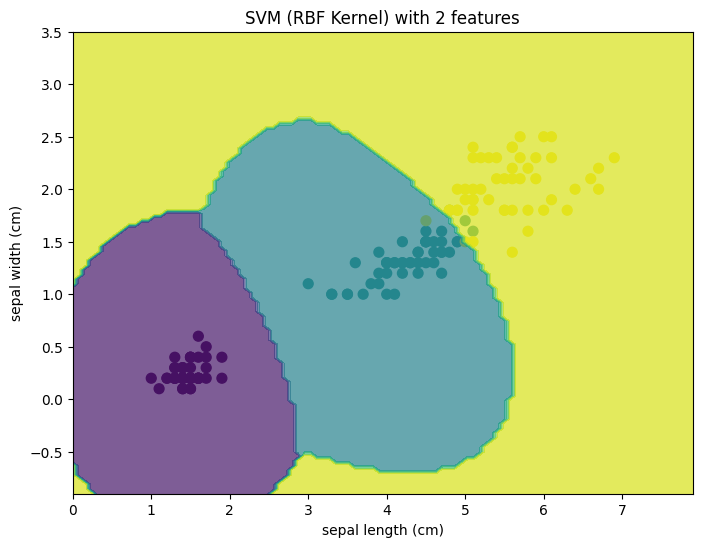

In [ ]:
from sklearn.inspection import DecisionBoundaryDisplay

X_for_SVM = X.iloc[:, 2:4]

model = SVC(kernel = "rbf", C=1, gamma=0.7)
model.fit(X_for_SVM, y)
title = "SVM (RBF Kernel) with 2 features"
plt.figure(figsize=(8, 6))
plt.scatter(X_for_SVM.iloc[:, 0], X_for_SVM.iloc[:, 1], c=y, s=50, cmap='viridis')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.title(title)

disp = DecisionBoundaryDisplay.from_estimator(model,
                                              X_for_SVM,
                                              response_method='predict',
                                              cmap='Dark2',
                                              alpha = 0.8,
                                              ax=ax)
disp.plot(ax=plt.gca(), cmap='viridis', alpha=0.7)